In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
# Nos traemos el data set 
df = pd.read_csv("../../Raw Data/players_basket.csv",encoding = "ISO-8859-1")
df.head(3)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz


In [3]:
df = df.loc[df["nationality"] != "United States"]
df = df.loc[df["nationality"] != "England"]
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
30,NBA,1999 - 2000,Regular_Season,Dirk Nowitzki,DAL,82,2938.0,515,1118,116,...,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN,1.0,9.0,Milwaukee Bucks
60,NBA,1999 - 2000,Regular_Season,Rik Smits,IND,79,1852.0,431,890,0,...,"Aug 23, 1966",7-4,224.0,250.0,113.0,Netherlands,Almonta High School,1.0,2.0,Indiana Pacers
65,NBA,1999 - 2000,Regular_Season,Vlade Divac,SAC,82,2374.0,384,764,7,...,"Feb 3, 1968",7-1,216.0,260.0,118.0,Serbia,NaN,1.0,26.0,Los Angeles Lakers
78,NBA,1999 - 2000,Regular_Season,Dikembe Mutombo,ATL,82,2984.0,322,573,0,...,"Jun 25, 1966",7-2,218.0,260.0,118.0,Democratic Republic of the Congo,Institute Boboto,1.0,4.0,Denver Nuggets
80,NBA,1999 - 2000,Regular_Season,Patrick Ewing,NYK,62,2035.0,361,775,0,...,"Aug 5, 1962",7-0,213.0,240.0,109.0,United States / Jamaica,Cambridge Rindge and Latin School,1.0,1.0,New York Knicks


In [4]:
df['dob'] = df['birth_date']

In [5]:
selected_columns = df[["Player","dob",]]
df = selected_columns.copy()
df = df[df['dob'].notna()]
df = df.drop_duplicates(subset='Player', keep="last")
df.head(3)

,Player,dob
218,Rik Smits,"Aug 23, 1966"
256,Detlef Schrempf,"Jan 21, 1963"
302,Luc Longley,"Jan 19, 1969"


In [6]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['day'] = pd.DatetimeIndex(df['dob']).day
df.head()

,Player,dob,year,month,day
218,Rik Smits,"Aug 23, 1966",1966,8,23
256,Detlef Schrempf,"Jan 21, 1963",1963,1,21
302,Luc Longley,"Jan 19, 1969",1969,1,19
357,Petar Naumoski,"Aug 27, 1968",1968,8,27
365,Dino Radja,"Apr 24, 1967",1967,4,24


In [7]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4   

In [8]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

In [9]:
df['Deporte'] = 'Baloncesto'

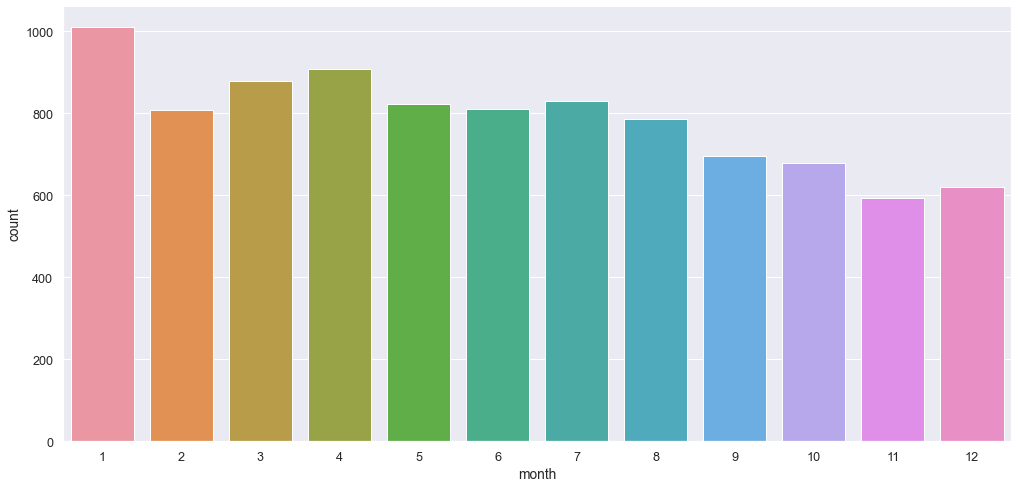

In [10]:
ax = sns.countplot(x="month", data=df)

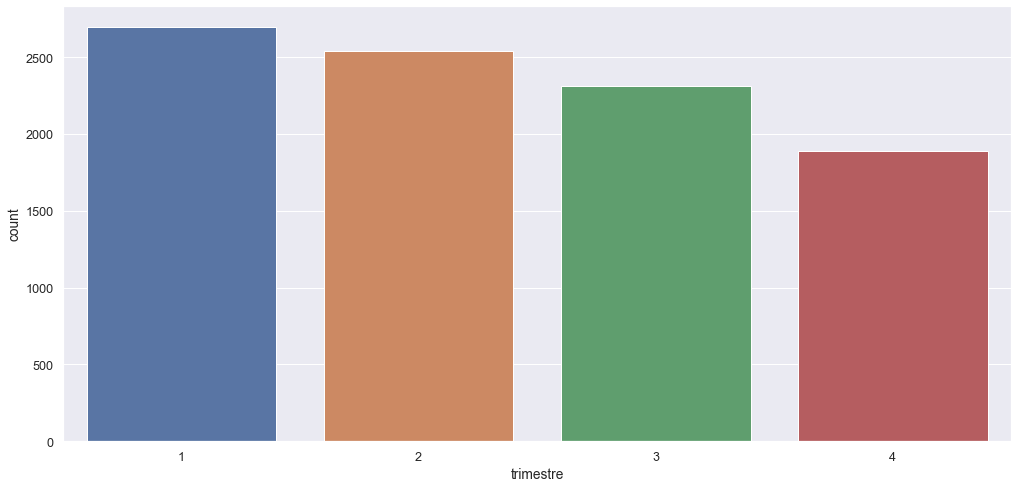

In [11]:
ax = sns.countplot(x="trimestre", data=df)

In [12]:
df.to_csv('../../Data/baloncesto.csv', encoding='utf-8')